<a href="https://colab.research.google.com/github/2003UJAN/2003UJAN/blob/main/phishing_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [2]:
#loading the dataset
data = pd.read_csv("/Phishing_Legitimate_full.csv")

In [3]:
#removing 1st column
data = data.drop(data.columns[0], axis=1)

In [4]:
#shuffling the data
data = shuffle(data)

In [5]:
# Check for columns with 90% or more similar values and drop them
threshold = 0.9 * len(data)
data = data.dropna(thresh=threshold, axis=1)

In [6]:

# list of categorical features
categorical_features = [
    'AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths',
    'HttpsInHostname','DoubleSlashInPath','EmbeddedBrandName','ExtFavicon','InsecureForms','RelativeFormAction',
    'ExtFormAction','AbnormalFormAction','FrequentDomainNameMismatch','FakeLinkInStatusBar','RightClickDisabled',
    'PopUpWindow','SubmitInfoToEmail','IframeOrFrame','MissingTitle','ImagesOnlyInForm','SubdomainLevelRT',
    'UrlLengthRT','PctExtResourceUrlsRT','AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT'
]

# list of numerical features
numerical_features = [x for x in data.columns if x not in categorical_features]

In [7]:
# Prepare data for training
X = data.drop('CLASS_LABEL', axis=1)
y = data['CLASS_LABEL']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
# Train Support Vector Machine (SVM) Classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [11]:
# Evaluate the model
y_pred = clf.predict(X_test)


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1167   67]
 [  66 1200]]


In [13]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Accuracy: 0.9468, Precision: 0.9471191791633781, Recall: 0.9478672985781991


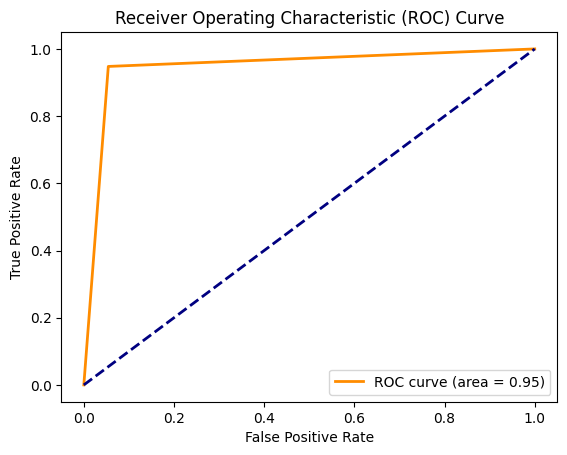

In [14]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


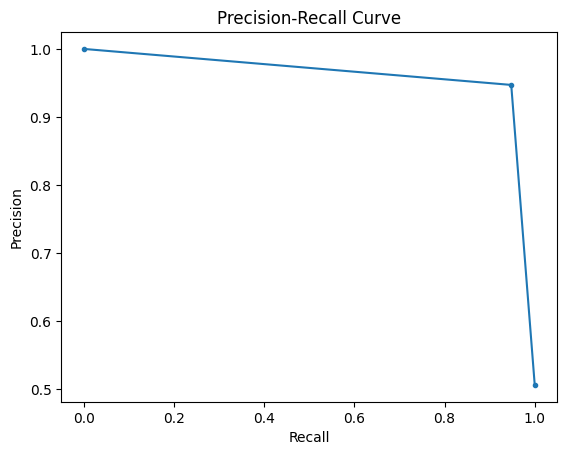

In [15]:
# Precision-Recall Curve (PRC)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()